# Hybrid Approaches in NLP: Combining Traditional Algorithms and Fuzzy Logic for Textual Insights

## Bag of words and TFIDF:

The bag of words model is by far the most common means of representing documents in data science. Under this model, a document is described soley by the set of words (and possibly their counts) that make up the document. All information about the actual ordering of the words is ignored. It is essentially the so-called "word cloud" view of a document.

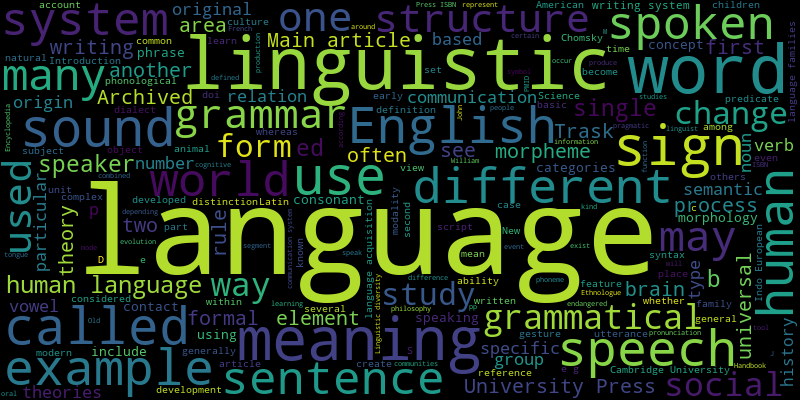

In [1]:
import wordcloud
from bs4 import BeautifulSoup
import requests
import re

response = requests.get("https://en.wikipedia.org/wiki/Language")
root = BeautifulSoup(response.content, "lxml")
from wordcloud import WordCloud
wc = WordCloud(width=800,height=400).generate(re.sub(r"\s+"," ", root.text))
wc.to_image()

### TFIDF


In [1]:
documents = ["Alex likes to walk with his dog", 
             "Alex and his dog are best friends", 
             "hello world this is random text"]

In [2]:
document_words = [doc.split() for doc in documents]
vocab = sorted(set(sum(document_words, [])))
vocab_dict = {k:i for i,k in enumerate(vocab)}
print(vocab, "\n")
print(vocab_dict, "\n")

['Alex', 'and', 'are', 'best', 'dog', 'friends', 'hello', 'his', 'is', 'likes', 'random', 'text', 'this', 'to', 'walk', 'with', 'world'] 

{'Alex': 0, 'and': 1, 'are': 2, 'best': 3, 'dog': 4, 'friends': 5, 'hello': 6, 'his': 7, 'is': 8, 'likes': 9, 'random': 10, 'text': 11, 'this': 12, 'to': 13, 'walk': 14, 'with': 15, 'world': 16} 



In [3]:
import numpy as np
X_tf = np.zeros((len(documents), len(vocab)), dtype=int)
for i,doc in enumerate(document_words):
    for word in doc:
        X_tf[i, vocab_dict[word]] += 1
print(X_tf)

[[1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0]
 [1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1]]


$$
idf_j = \log(\frac{ N_{documents}}{ N_{documents\enskip with\enskip word\enskip j}})
$$

In [4]:
idf = np.log(X_tf.shape[0]/X_tf.astype(bool).sum(axis=0))
print(idf)

[0.40546511 1.09861229 1.09861229 1.09861229 0.40546511 1.09861229
 1.09861229 0.40546511 1.09861229 1.09861229 1.09861229 1.09861229
 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229]


In [5]:
X_tfidf = X_tf * idf
print(X_tfidf)

[[0.40546511 0.         0.         0.         0.40546511 0.
  0.         0.40546511 0.         1.09861229 0.         0.
  0.         1.09861229 1.09861229 1.09861229 0.        ]
 [0.40546511 1.09861229 1.09861229 1.09861229 0.40546511 1.09861229
  0.         0.40546511 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.09861229 0.         1.09861229 0.         1.09861229 1.09861229
  1.09861229 0.         0.         0.         1.09861229]]


$$
CosineSimilarity(x,y) = \frac{x^T y}{\|x\|_2 \cdot \|y\|_2}
$$

In [14]:
X_tfidf_norm = X_tfidf / np.linalg.norm(X_tfidf, axis=1)[:,None]
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)

[[1.         0.09269042 0.        ]
 [0.09269042 1.         0.        ]
 [0.         0.         1.        ]]


## N-grams

In [16]:
n = 2
text = "Alex likes to walk with his dog, Alex and his dog are best friends"
split_text = text.lower().translate(str.maketrans({'.': '', ',': ''})).split()
doc_n_gram = [' '.join(split_text[i:i+n]) for i in range(0,len(split_text),n)]
print(doc_n_gram)

['alex likes', 'to walk', 'with his', 'dog alex', 'and his', 'dog are', 'best friends']
